In [11]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from keras import backend as K

EPOCHS = 20

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
labelEncoder = tf.keras.layers.CategoryEncoding(num_tokens = 10, output_mode='one_hot')
y_train = labelEncoder(np.array(y_train, dtype=np.int64))
y_test = labelEncoder(np.array(y_test, dtype = np.int64))

In [15]:
x_train = np.reshape(x_train, (-1, 28*28))
x_test = np.reshape(x_test, (-1, 28*28))

In [16]:
reluModel = tf.keras.models.Sequential()
reluModel.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape = (28*28, )))
reluModel.add(tf.keras.layers.Dense(64, activation = 'relu'))
reluModel.add(tf.keras.layers.Dense(10, activation = 'softmax'))
reluModel.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [17]:
# from tensorflow.python import metrics
reluModelHistory = reluModel.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2353 - accuracy: 0.9295 - val_loss: 0.1395 - val_accuracy: 0.9566
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1076 - accuracy: 0.9685 - val_loss: 0.1106 - val_accuracy: 0.9682
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.0956 - val_accuracy: 0.9728
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9810 - val_loss: 0.1099 - val_accuracy: 0.9702
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0551 - accuracy: 0.9842 - val_loss: 0.0921 - val_accuracy: 0.9768
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9868 - val_loss: 0.1005 - val_accuracy: 0.9780
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0404 - accuracy: 0.9886 - val_loss: 0.1313 - val_accuracy:

In [18]:
lambdaModel = tf.keras.models.Sequential()
lambdaModel.add(tf.keras.layers.Dense(128, input_shape = (28*28, )))
lambdaModel.add(tf.keras.layers.Lambda(lambda x: tf.abs(x)))
lambdaModel.add(tf.keras.layers.Dense(64, activation = 'relu'))
lambdaModel.add(tf.keras.layers.Dense(10, activation = 'softmax'))
lambdaModel.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])
lambdaModelHistory = lambdaModel.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2170 - accuracy: 0.9357 - val_loss: 0.1132 - val_accuracy: 0.9673
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0998 - accuracy: 0.9706 - val_loss: 0.1118 - val_accuracy: 0.9702
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.0912 - val_accuracy: 0.9764
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9814 - val_loss: 0.1256 - val_accuracy: 0.9679
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0558 - accuracy: 0.9842 - val_loss: 0.1143 - val_accuracy: 0.9735
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9866 - val_loss: 0.1035 - val_accuracy: 0.9778
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9884 - val_loss: 0.1161 - val_accuracy:

In [19]:
def custom_relu(x):
  return K.maximum(0.001, x)
customLayerModel = tf.keras.models.Sequential()
customLayerModel.add(tf.keras.layers.Dense(128, input_shape = (28*28, )))
customLayerModel.add(tf.keras.layers.Lambda(custom_relu))
customLayerModel.add(tf.keras.layers.Dense(64, activation = 'relu'))
customLayerModel.add(tf.keras.layers.Dense(10, activation = 'softmax'))
customLayerModel.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])
customLayerModelHistory = customLayerModel.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2368 - accuracy: 0.9304 - val_loss: 0.1264 - val_accuracy: 0.9639
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9679 - val_loss: 0.1111 - val_accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0814 - accuracy: 0.9765 - val_loss: 0.1074 - val_accuracy: 0.9699
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9811 - val_loss: 0.1014 - val_accuracy: 0.9727
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - accuracy: 0.9838 - val_loss: 0.0908 - val_accuracy: 0.9783
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0486 - accuracy: 0.9868 - val_loss: 0.0985 - val_accuracy: 0.9767
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9881 - val_loss: 0.0891 - val_accuracy:

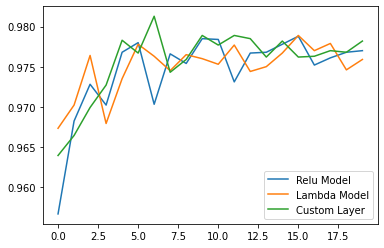

In [20]:
import matplotlib.pyplot as plt
plt.plot(reluModelHistory.history['val_accuracy'], label=['relu layer'])
plt.plot(lambdaModelHistory.history['val_accuracy'])
plt.plot(customLayerModelHistory.history['val_accuracy'])
plt.legend(['Relu Model', 'Lambda Model', 'Custom Layer'])